# Checkpoint: Association Rules

## Ali LAMINE

Let's say you are a machine learning engineer working for a clothing company and you want to adopt new strategies to improve the company's profit.

Use this dataset and the association rules mining to find new marketing plans. 

Note that one of the strategies can be based on which items should be put together

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Bonus: Try to do some visualization before applying the Apriori algorithm.

Let's do the same checkpoint but with a bigger dataset!

# First Dataset

In [22]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [23]:
# Apriori Preparation
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


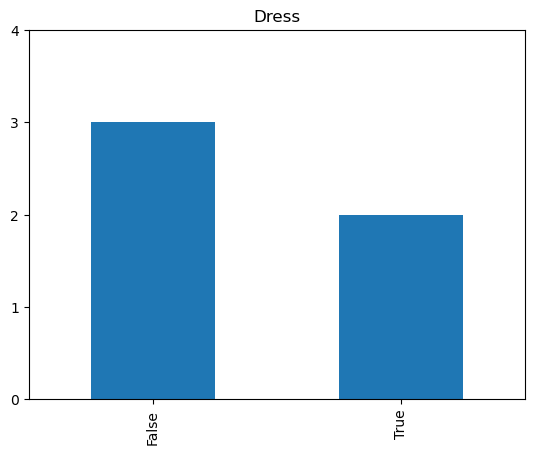

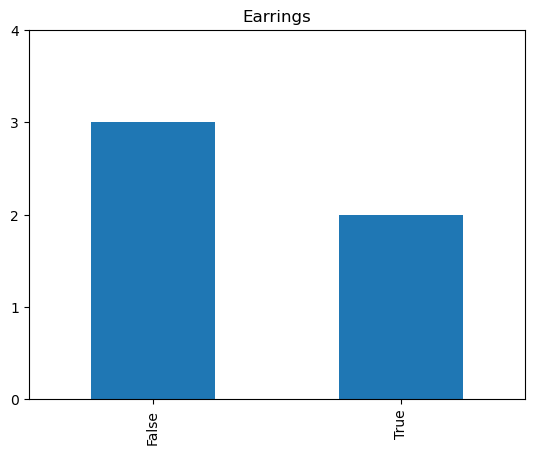

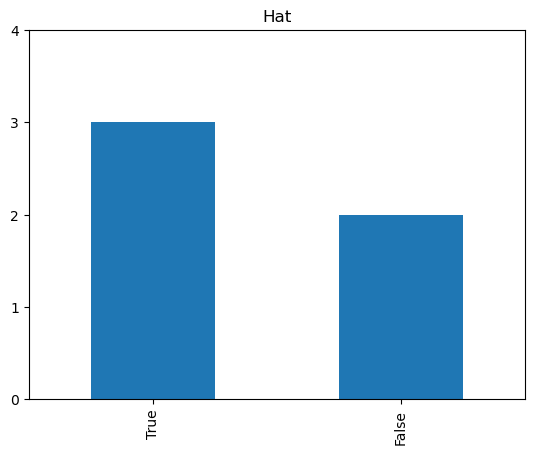

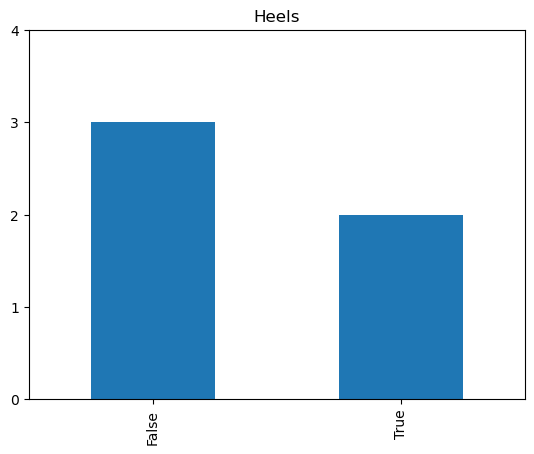

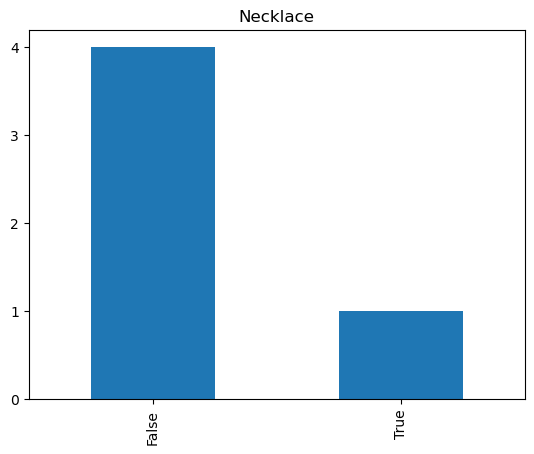

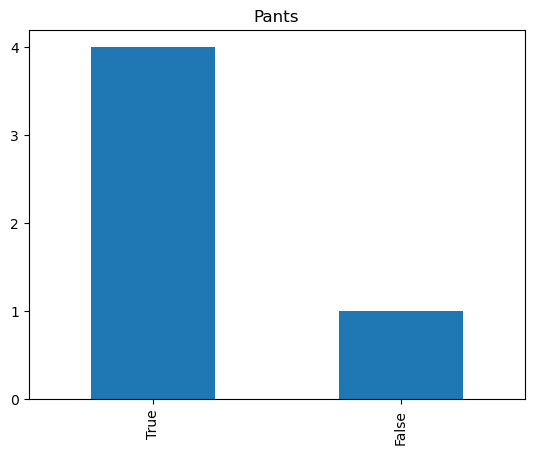

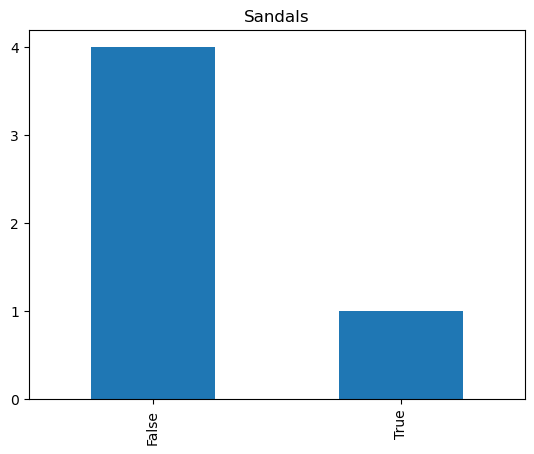

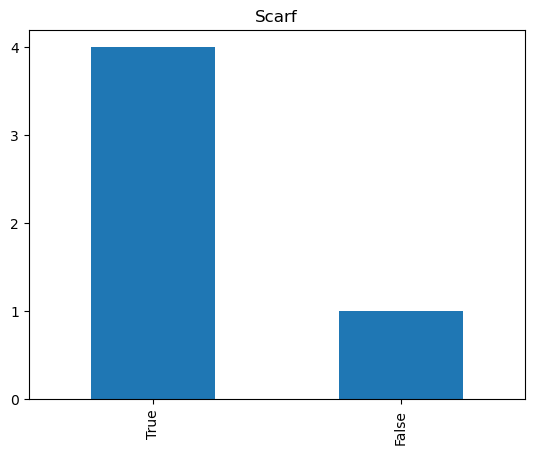

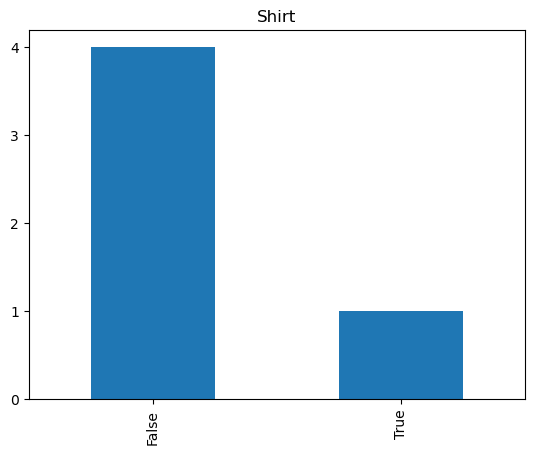

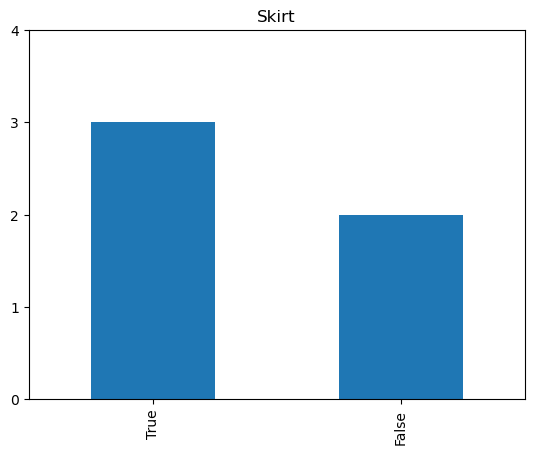

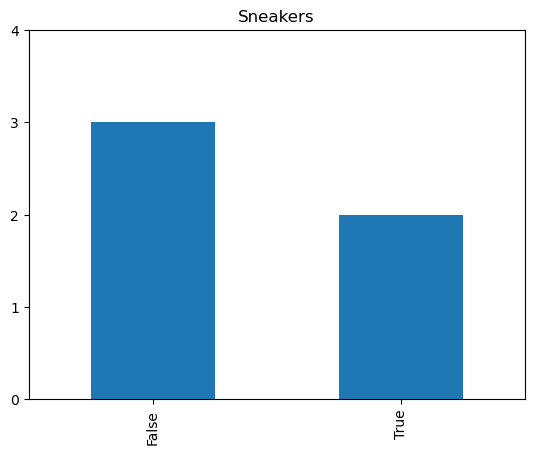

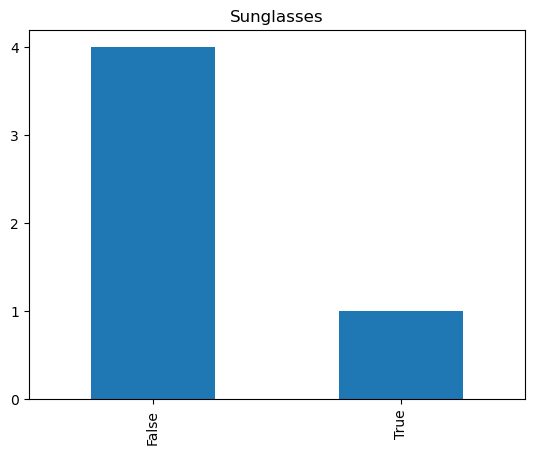

In [24]:
# Data Visualization
import matplotlib.pyplot as plt
for col in df.columns:
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.yticks([0,1,2,3,4])
    plt.show()

In [25]:
# Support Code
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [26]:
# Support with Column Names
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


80% of the baskets contains pants and scarf while 60% contains hat, skirt, (scarf and pants together) and (skirt and pants together)

In [27]:
# Confidence Code
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


Buying a skirt means that the customer would buy pants too with 100% confidence 

In [28]:
# Lift Code
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


Skirt and pants are buyed together more likely than buying a skirt solely.

# Second Dataset

In [29]:
# Read dataset
data=pd.read_csv("C:/Users/LENOVO/Desktop/Market_Basket_Optimisation.csv",header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [33]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.shape

(7501, 20)

In [31]:
data.isnull().sum().sum()

120657

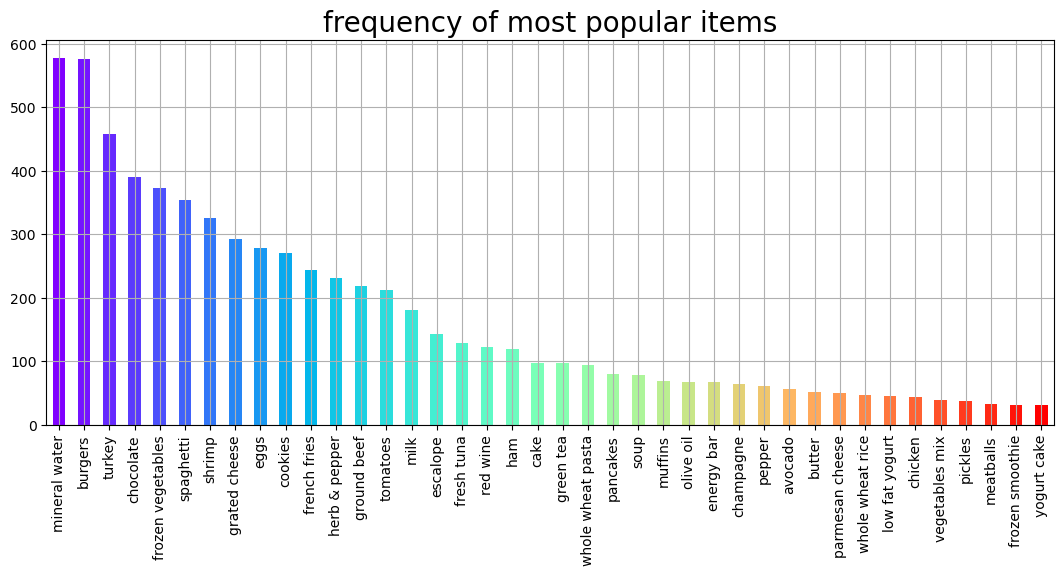

In [32]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [34]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [42]:
# Apriori Preparation
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_).drop('nan', axis=1)  #Creating a new DataFrame from our Numpy array
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# Support Code
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.07)

,support,itemsets
0,0.087188,(15)
1,0.081056,(17)
2,0.163845,(25)
3,0.080389,(30)
4,0.179709,(37)
5,0.079323,(40)
6,0.170911,(43)
7,0.095321,(49)
8,0.132116,(54)
9,0.098254,(55)


In [44]:
# Support with Column Names
frequent_itemsets=apriori(df, min_support=0.07, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.163845,(chocolate)
3,0.080389,(cookies)
4,0.179709,(eggs)
5,0.079323,(escalope)
6,0.170911,(french fries)
7,0.095321,(frozen vegetables)
8,0.132116,(green tea)
9,0.098254,(ground beef)


The most puchased item is mineral water with 23% only

In [45]:
# Confidence Code
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence", min_threshold=0.0000000001) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [46]:
# Lift Code
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=0.00000000001)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


No association rules detected!!!! We need more data!!!